# Keras入門

## Kerasとは？

- [François Cholletさん](https://www.quora.com/session/Fran%C3%A7ois-Chollet/1) ([@fchollet](https://twitter.com/fchollet?lang=ja))によって開発された深層学習用ライブラリ
- 特徴
    - バックエンドとしてTheanoとTensorFlowの両方をサポート
    - 使いやすいので海外で人気が高い
    - ドキュメンテーションが丁寧で分かりやすい
    - 最近、ドキュメントが日本語に翻訳され、日本でも人気が出てきている
- KerasのHP
    - 英語： https://keras.io
    - 日本語: https://keras.io/ja/

# Kerasで多層パーセプトロン（Multi-Layer Perceptron, MLP）を組んで手書き文字を判別してみよう

### 参考資料
- https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py

## モデルの構築

- モデルの記述法には２種類ある
    - 単純なモデルは`Sequential`モデルを使って記述
    - 複雑なモデルは[`Keras functional API`](https://keras.io/ja/getting-started/functional-api-guide/)を使って記述（推奨）

In [1]:
import keras

Using TensorFlow backend.


### 方法１：Keras Sequential model

In [2]:
from keras.models import Sequential
from keras.layers import Dense

In [3]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

### 方法２：Keras functional API（推奨）

In [4]:
from keras.models import Model
from keras.layers import Input, Dense

In [5]:
inputs = Input(shape=(784, ))
x = Dense(512, activation='relu')(inputs)
outputs = Dense(10, activation='softmax')(x)

In [6]:
model = Model(input=inputs, output=outputs)

## モデルの可視化

In [7]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 784)           0                                            
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 512)           401920      input_1[0][0]                    
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 10)            5130        dense_3[0][0]                    
Total params: 407050
____________________________________________________________________________________________________


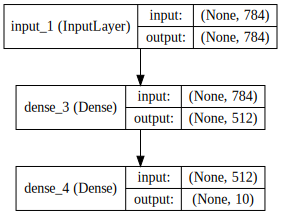

In [8]:
# モデルの可視化用モジュールの読み込み
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

# モデルの可視化
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## モデルのコンパイル

- 最適化手法の選択
    - 通常はAdadeltaかAdam、もしくはSGD with Nesterov momentumでOK
    - RNNならRMSpropが安定している
    - 超複雑なネットワークを、大量のデータで学習させるときには極力小さな学習率でシンプルなSGD without momentumを用いるのが良かったりする。（validation errorの減少が止まったら学習率を半分にする）
- 最適化手法の違い
    - [勾配降下法の最適化アルゴリズムを概観する](http://postd.cc/optimizing-gradient-descent/)
    - [An overview of gradient descent optimization algorithms](http://sebastianruder.com/optimizing-gradient-descent/)

In [9]:
# ==== デフォルト設定で使う場合 ====
# optimizerに全て小文字のストリングを渡すだけ（超カンタン！）
# 例えば以下のような設定が使える
# optimizer='sgd'
# optimizer='adadelta'
# optimizer='adam'
# optimizer='rmsprop

# ==== 好みに合わせて設定を変えたい場合 ====
# まず、最適化手法のクラスを読み込む
from keras.optimizers import SGD, Adadelta, Adam, RMSprop
# それらをインスタンス化してからoptimizer引数に渡す
# 例）　SGD with Nesterov momentum を用いる場合
sgd_nesterov=SGD(lr=0.01, momentum=0.9, nesterov=True)

# モデルのコンパイル
model.compile(loss='categorical_crossentropy', # 損失関数（この量のパラメータ勾配で学習する）
              optimizer='sgd', # 最適化手法（デフォルト設定）
              #optimizer='rmsprop', # 最適化手法（デフォルト設定）
              #optimizer=sgd_nesterov, # 最適化手法（お好み設定）
              metrics=['accuracy'] # 評価指標
             )

## モデルの保存

In [10]:
# JSON形式でモデルを保存
json_string = model.to_json()
open('./mnist_mlp_model.json', 'w').write(json_string)

In [11]:
# YAML形式でモデルを保存
yaml_string = model.to_yaml()
open('./mnist_mlp_model.yaml', 'w').write(yaml_string)

## パラメータの保存

In [12]:
#　初期ウエイトの保存
model.save_weights('./mnist_mlp_init_weight.hdf5', overwrite=True)

## モデルの読み出し

In [13]:
from keras.models import model_from_json, model_from_yaml

In [14]:
# JSON形式で保存されたモデルの呼び出し
#json_string = open('./mnist_mlp_model.json', 'r').read()
#model = model_from_json(json_string)

In [15]:
# YAML形式で保存されたモデルの呼び出し
#yaml_string = open('./mnist_mlp_model.yaml', 'r').read()
#model = model_from_yaml(yaml_string)

## パラメータの読み出し

In [16]:
#model.load_weights('./mnist_mlp_init_weight.hdf5')

## MNISTデータセットの読み込み

In [17]:
from keras.datasets import mnist

In [18]:
# 手書き文字データセット（MNIST）の読み込み
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [19]:
# X_trainを見てみる
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ..., 
       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, 

In [20]:
# X_trainの形を確認
X_train.shape

(60000, 28, 28)

In [21]:
# X_trainの最大値と最小値を確認
X_train.max()

255

In [22]:
X_train.min()

0

In [23]:
# y_trainを見てみる
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

## データの可視化

In [24]:
# 可視化用ライブラリの読み込み
%matplotlib inline
import matplotlib.pyplot as plt

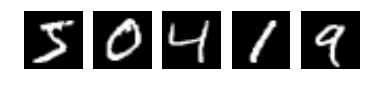

In [25]:
# 入力データを可視化（最初の５文字）
fig, ax = plt.subplots(1, 5)

for ii in range(5):
    ax[ii].imshow(X_train[ii], cmap='gray')
    ax[ii].axis('off')

## データの前処理

In [26]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

(60000, 'train samples')
(10000, 'test samples')


In [27]:
from keras.utils import np_utils

In [28]:
nb_classes = 10

In [29]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [30]:
Y_train[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [31]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

## 学習

- tensorboard --logdir=/tmp/keras_mnist_mlp
- http://0.0.0.0:6006

In [32]:
# TensorBoardで学習の進捗状況をみる
tb_cb = keras.callbacks.TensorBoard(log_dir='/tmp/keras_mnist_mlp', histogram_freq=1)

# バリデーションロスが下がれば、エポックごとにモデルを保存
cp_cb = keras.callbacks.ModelCheckpoint(filepath='./mnist_mlp_best_weight.hdf5', 
                                        monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# バリデーションロスが５エポック連続で上がったら、ランを打ち切る
es_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')

cbks = [tb_cb, cp_cb, es_cb]

In [33]:
import time

In [34]:
tic = time.time()

# 学習を実行
# 学習途中の損失関数の値などはhistory.historyに保存される。
history = model.fit(X_train, Y_train,
                    batch_size=128, 
                    nb_epoch=20,
                    verbose=0,
                    validation_data=(X_test, Y_test),
                    callbacks=cbks)

toc = time.time()

# 学習にかかった時間を表示
print("Execution time: {0:.2f} [sec]".format(toc - tic))

Epoch 00000: val_loss improved from inf to 0.60303, saving model to ./mnist_mlp_best_weight.hdf5
Epoch 00001: val_loss improved from 0.60303 to 0.43377, saving model to ./mnist_mlp_best_weight.hdf5
Epoch 00002: val_loss improved from 0.43377 to 0.37293, saving model to ./mnist_mlp_best_weight.hdf5
Epoch 00003: val_loss improved from 0.37293 to 0.34087, saving model to ./mnist_mlp_best_weight.hdf5
Epoch 00004: val_loss improved from 0.34087 to 0.31854, saving model to ./mnist_mlp_best_weight.hdf5
Epoch 00005: val_loss improved from 0.31854 to 0.30245, saving model to ./mnist_mlp_best_weight.hdf5
Epoch 00006: val_loss improved from 0.30245 to 0.29029, saving model to ./mnist_mlp_best_weight.hdf5
Epoch 00007: val_loss improved from 0.29029 to 0.27976, saving model to ./mnist_mlp_best_weight.hdf5
Epoch 00008: val_loss improved from 0.27976 to 0.27163, saving model to ./mnist_mlp_best_weight.hdf5
Epoch 00009: val_loss improved from 0.27163 to 0.26216, saving model to ./mnist_mlp_best_weight

注： ValueError: I/O operation on closed fileと出たら, model.fit(..., verbose=0, ...) とすべし

## ベストなパラメータの呼び出し

In [35]:
model.load_weights('./mnist_mlp_best_weight.hdf5')

## 学習結果の評価

In [36]:
# テストデータに対する評価値
score = model.evaluate(X_test, Y_test, verbose=0)

In [37]:
print('Test score:', score[0]) # 損失関数の値
print('Test accuracy:', score[1]) # 精度

('Test score:', 0.20738210867941378)
('Test accuracy:', 0.94140000000000001)


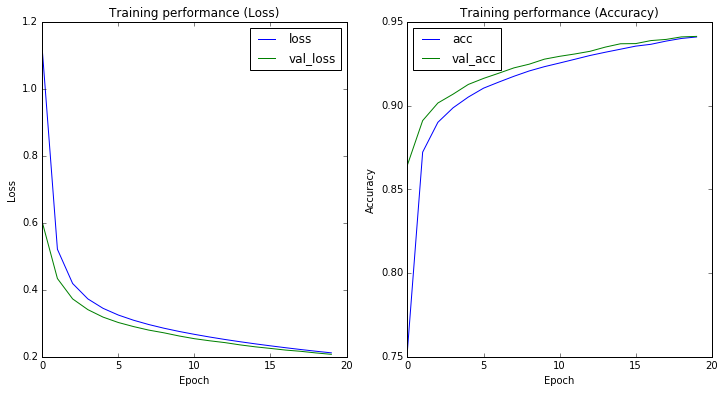

In [38]:
# 学習曲線
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('Training performance (Loss)')
ax[0].plot(history.epoch, history.history['loss'], label='loss')
ax[0].plot(history.epoch, history.history['val_loss'], label='val_loss')
ax[0].set(xlabel='Epoch', ylabel='Loss')
ax[0].legend()

ax[1].set_title('Training performance (Accuracy)')
ax[1].plot(history.epoch, history.history['acc'], label='acc')
ax[1].plot(history.epoch, history.history['val_acc'], label='val_acc')
ax[1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1].legend(loc='best')

In [39]:
# 予測値
Y_test_pred = model.predict(X_test)

In [40]:
# 予測の形
Y_test_pred.shape

(10000, 10)

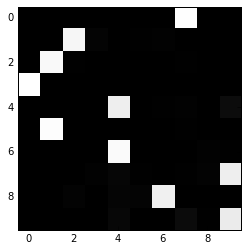

In [41]:
# 予測の可視化
plt.imshow(Y_test_pred[:10], cmap='gray', interpolation='nearest', vmin=0, vmax=1)

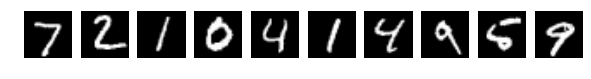

In [42]:
# 入力データを可視化（最初の10文字）
fig, ax = plt.subplots(1, 10, figsize=(10, 2))

for ii in range(10):
    ax[ii].imshow(X_test[ii].reshape(28, 28), cmap='gray')
    ax[ii].axis('off')

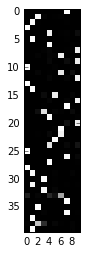

In [43]:
plt.imshow(Y_test_pred[:40], cmap='gray', interpolation='nearest', vmin=0, vmax=1)

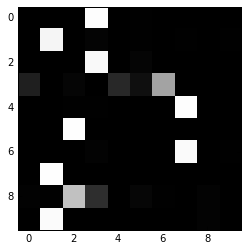

In [44]:
# 予測の可視化
plt.imshow(Y_test_pred[30:40], cmap='gray', interpolation='nearest', vmin=0, vmax=1)

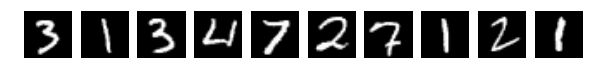

In [45]:
# 入力データを可視化（30~39文字目までの10文字）
fig, ax = plt.subplots(1, 10, figsize=(10, 2))

for ii in range(10):
    ax[ii].imshow(X_test[ii+30].reshape(28, 28), cmap='gray')
    ax[ii].axis('off')